In [20]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler

In [22]:
BG = "#44020E"       # тёмно-малиновый фон
CREAM = "#ebcd95"    # сливочный базовый

# Набор "сливочных" оттенков для нескольких рядов (чтобы различались, но были в одной гамме)
cream_palette = [
    "#ebcd95",  # base
    "#f2ddb5",
    "#f7e8cd",
    "#e0be83",
    "#d6ad6e",
    "#fff3dd",
    "#cfa561",
    "#f0d7a8",
]

mpl.rcParams.update({
    # Фон
    "figure.facecolor": BG,
    "axes.facecolor": BG,
    "savefig.facecolor": BG,

    # Оси/подписи/тики/текст (в сливочном, чтобы читалось)
    "axes.edgecolor": CREAM,
    "axes.labelcolor": CREAM,
    "xtick.color": CREAM,
    "ytick.color": CREAM,
    "text.color": CREAM,
    "axes.titlecolor": CREAM,

    # Сетка (легкая сливочная)
    "axes.grid": True,
    "grid.color": CREAM,
    "grid.alpha": 0.22,
    "grid.linewidth": 0.8,
    "grid.linestyle": "-",

    # Линии/маркеры по умолчанию
    "lines.linewidth": 2.2,
    "lines.markersize": 6,

    # Легенда
    "legend.facecolor": BG,
    "legend.edgecolor": CREAM,
    "legend.labelcolor": CREAM,

    # Плотность/качество
    "figure.dpi": 130,
    "savefig.dpi": 300,
})

# Цветовой цикл для всех графиков (линии/столбики/точки)
plt.rcParams["axes.prop_cycle"] = cycler(color=cream_palette)

In [23]:
df = pd.read_csv("df_eda_4438 (1).csv")
df.head()

,name,monWT,tueWT,wedWT,thuWT,friWT,satWT,sunWT,avgBill,rating,...,categories,name_repeats,lat,lon,metro_m^2,avgBill_num,cuisine_count,tables_max,distance_meters,24h
0,Абу Гош,12:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,700-900,4.7,...,Кафе,2,55.746948,37.586985,513561.0,800.0,5,6.0,380.0,0
1,АндерСон,09:00–22:00,09:00–22:00,09:00–22:00,09:00–22:00,09:00–22:00,10:00–22:00,10:00–22:00,1000-1000,4.5,...,"Кафе, Кейтеринг, Кондитерская",7,55.745002,37.597809,553778.0,1000.0,6,10.0,300.0,0
2,АндерСон,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,1200-1500,4.7,...,"Кафе, Кофейня, Кондитерская",7,55.739326,37.666387,409669.0,1350.0,7,13.0,660.0,0
3,Бейрут,12:00–23:00,12:00–23:00,12:00–23:00,12:00–23:00,12:00–23:00,12:00–23:00,12:00–23:00,1000-1000,4.7,...,Кафе,1,55.764247,37.653209,403337.0,1000.0,6,NaN,750.0,0
4,Биджо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900-1500,4.9,...,"Кафе, Доставка еды и обедов, Бар",2,55.679514,37.565335,322696.0,1200.0,9,13.0,115.0,0


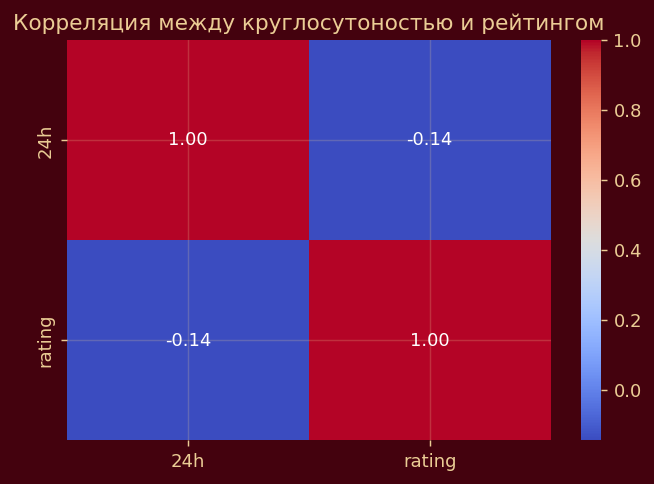

In [24]:
import seaborn as sns

corr_matrix = df[['24h', 'rating']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между круглосутоностью и рейтингом')
plt.show()

In [25]:

metro_inside_sadovoe = [
    "Александровский сад","Арбатская","Библиотека им. Ленина","Боровицкая",
    "Охотный ряд","Театральная","Площадь Революции","Лубянка","Кузнецкий мост",
    "Китай-город","Третьяковская","Новокузнецкая","Полянка","Кропоткинская",
    "Парк культуры","Смоленская",
    "Пушкинская","Тверская","Чеховская","Маяковская",
    "Цветной бульвар","Трубная","Сретенский бульвар","Тургеневская","Чистые пруды",
    "Красные Ворота","Сухаревская",
    "Курская","Чкаловская","Таганская","Марксистская",
    "Павелецкая","Добрынинская","Серпуховская","Октябрьская",
    "Баррикадная","Краснопресненская"
]


df_c = df[df["metro"].isin(metro_inside_sadovoe)].copy()


df_c["cuisine_clean"] = df_c["cuisine"].astype(str).str.strip().str.lower()
df_c["rateAmount_num"] = pd.to_numeric(df_c["rateAmount"], errors="coerce")

print("N after metro filter:", len(df_c))
print("Missing rateAmount:", df_c["rateAmount_num"].isna().sum())

N after metro filter: 1232
Missing rateAmount: 4


In [26]:

mask_A = df_c["cuisine_clean"].eq("итальянская")

mask_fr_present = df_c["cuisine_clean"].str.contains(r"(^|,\s*)французская(,|$)", regex=True, na=False)
mask_it_present = df_c["cuisine_clean"].str.contains(r"(^|,\s*)итальянская(,|$)", regex=True, na=False)
mask_B = mask_fr_present & (~mask_it_present)

A = df_c.loc[mask_A, "rateAmount_num"].dropna().astype(float)
B = df_c.loc[mask_B, "rateAmount_num"].dropna().astype(float)

print("Group A (Italian only) n =", len(A))
print("Group B (French present, no Italian) n =", len(B))

Group A (Italian only) n = 35
Group B (French present, no Italian) n = 29


/tmp/ipython-input-4240628477.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_fr_present = df_c["cuisine_clean"].str.contains(r"(^|,\s*)французская(,|$)", regex=True, na=False)
/tmp/ipython-input-4240628477.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask_it_present = df_c["cuisine_clean"].str.contains(r"(^|,\s*)итальянская(,|$)", regex=True, na=False)


In [27]:
def describe_series(x: pd.Series) -> dict:
    x = x.dropna().astype(float)
    return {
        "n": int(x.shape[0]),
        "mean": float(x.mean()),
        "std": float(x.std(ddof=1)),
        "var": float(x.var(ddof=1)),
        "median": float(x.median()),
        "q25": float(x.quantile(0.25)),
        "q75": float(x.quantile(0.75)),
        "min": float(x.min()),
        "max": float(x.max()),
        "skew": float(stats.skew(x, bias=False)),
        "kurtosis(excess)": float(stats.kurtosis(x, fisher=True, bias=False)),
    }

desc_A = describe_series(A)
desc_B = describe_series(B)

pd.DataFrame([desc_A, desc_B], index=["A_ital_only", "B_fr_no_ital"])

,n,mean,std,var,median,q25,q75,min,max,skew,kurtosis(excess)
A_ital_only,35,1534.457143,1513.883462,2.291843e+06,1034.0,369.0,2093.5,19.0,5594.0,1.286073,0.830746
B_fr_no_ital,29,2203.793103,2892.017257,8.363764e+06,1228.0,668.0,2154.0,35.0,14477.0,3.030165,11.353698


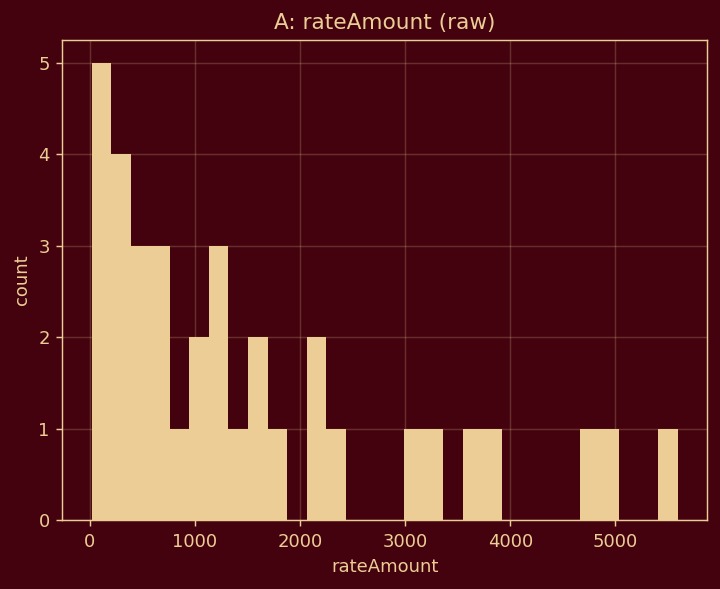

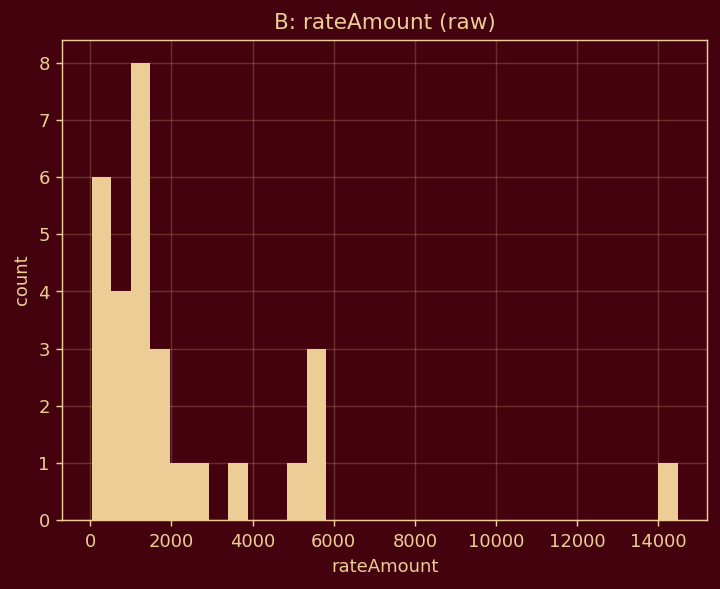

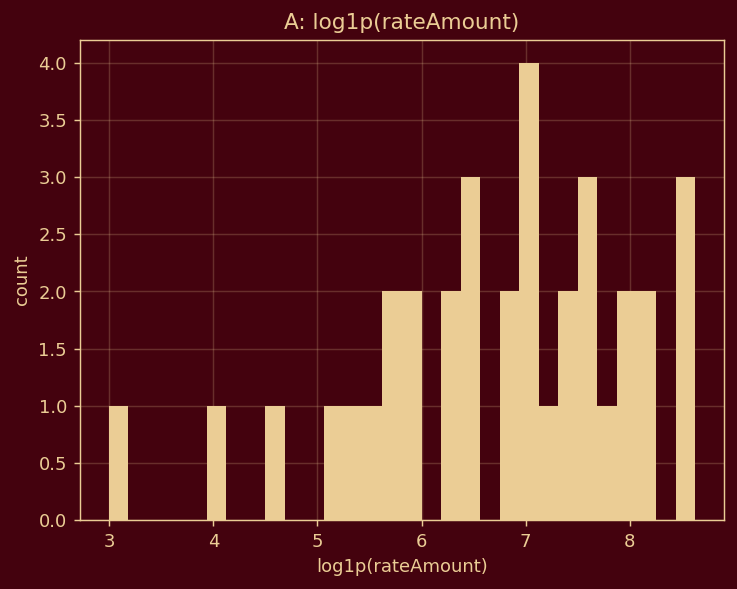

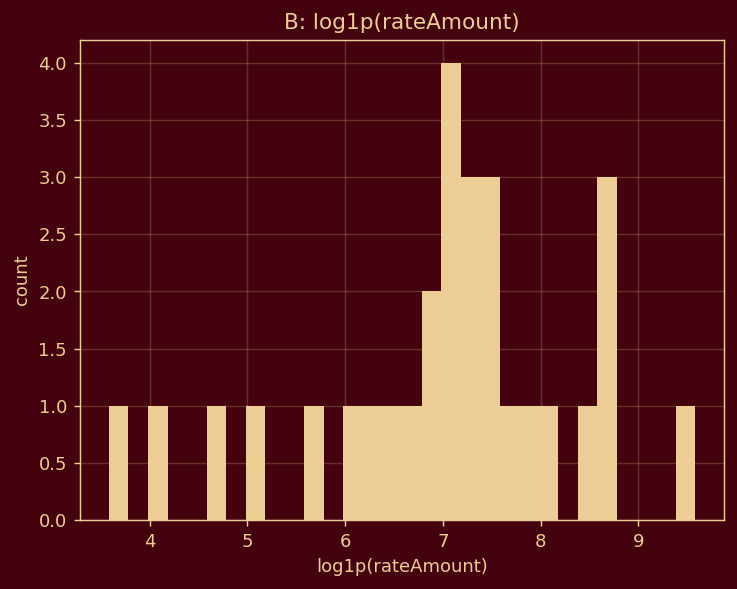

In [28]:
plt.figure()
plt.hist(A, bins=30)
plt.title("A: rateAmount (raw)")
plt.xlabel("rateAmount")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(B, bins=30)
plt.title("B: rateAmount (raw)")
plt.xlabel("rateAmount")
plt.ylabel("count")
plt.show()

A_log = np.log1p(A)
B_log = np.log1p(B)

plt.figure()
plt.hist(A_log, bins=30)
plt.title("A: log1p(rateAmount)")
plt.xlabel("log1p(rateAmount)")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(B_log, bins=30)
plt.title("B: log1p(rateAmount)")
plt.xlabel("log1p(rateAmount)")
plt.ylabel("count")
plt.show()

<Figure size 832x624 with 0 Axes>

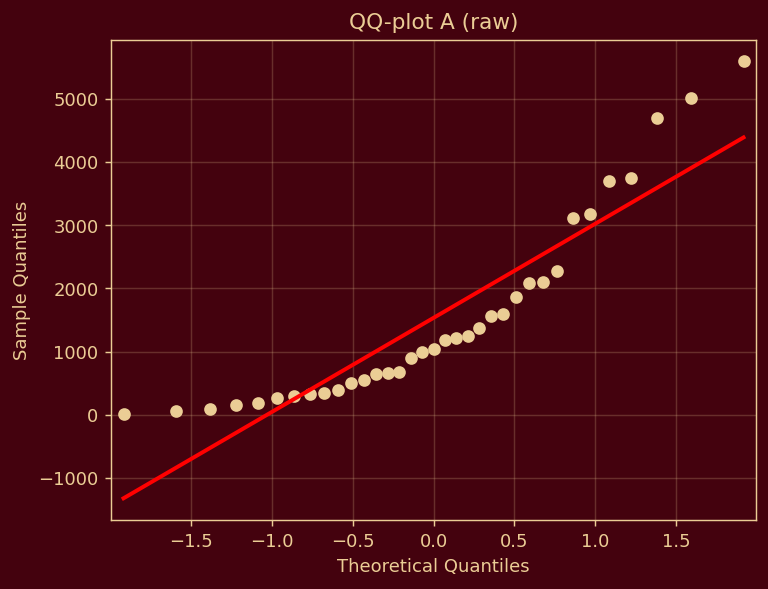

<Figure size 832x624 with 0 Axes>

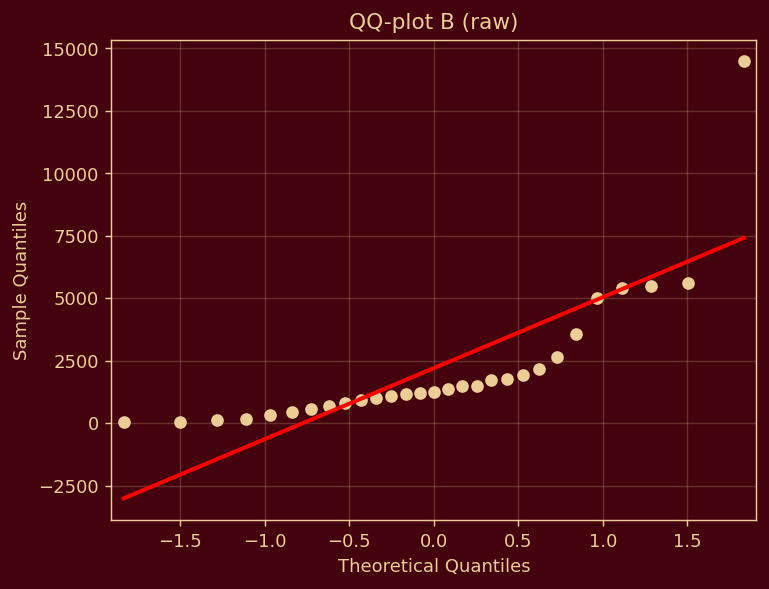

<Figure size 832x624 with 0 Axes>

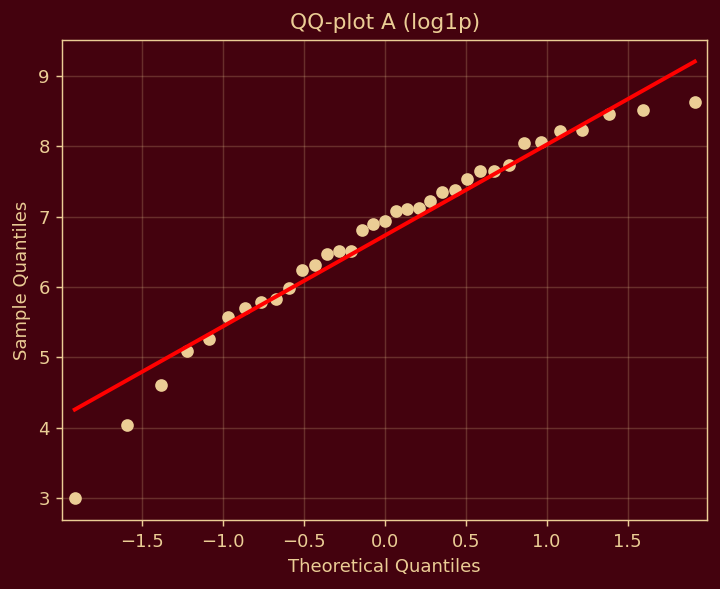

<Figure size 832x624 with 0 Axes>

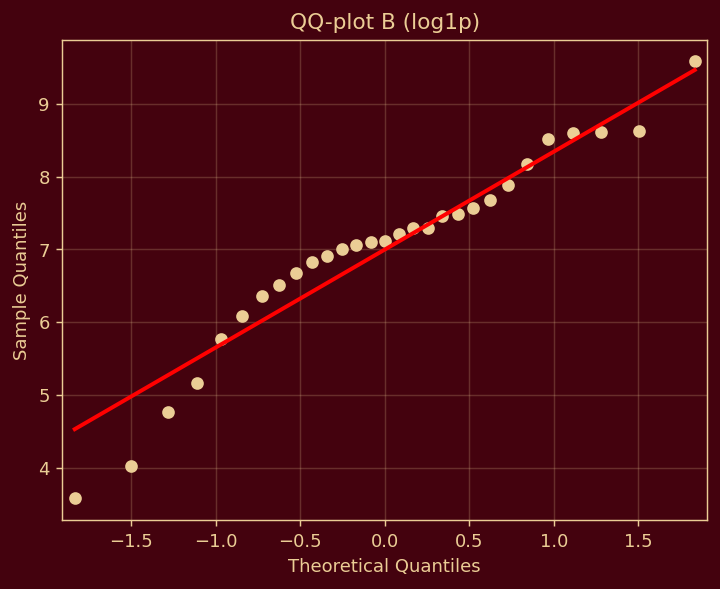

In [29]:
import statsmodels.api as sm

plt.figure()
sm.qqplot(A, line="s")
plt.title("QQ-plot A (raw)")
plt.show()

plt.figure()
sm.qqplot(B, line="s")
plt.title("QQ-plot B (raw)")
plt.show()

plt.figure()
sm.qqplot(A_log, line="s")
plt.title("QQ-plot A (log1p)")
plt.show()

plt.figure()
sm.qqplot(B_log, line="s")
plt.title("QQ-plot B (log1p)")
plt.show()

In [30]:
def normality_tests(x, name):
    x = x.dropna().astype(float).values
    n = len(x)

    print("\n", name, "n =", n)

    if n <= 5000:
        w, p = stats.shapiro(x)
        print("Shapiro:", round(w, 4), "p =", p)
    else:
        print("Shapiro: skip")

    if n >= 20:
        k2, p = stats.normaltest(x)
        print("DAgostino:", round(k2, 4), "p =", p)
    else:
        print("DAgostino: skip")


normality_tests(A, "A raw")
normality_tests(B, "B raw")
normality_tests(A_log, "A log")
normality_tests(B_log, "B log")


 A raw n = 35
Shapiro: 0.8435 p = 0.0001649051692264366
DAgostino: 9.9252 p = 0.006994688143784524

 B raw n = 29
Shapiro: 0.6533 p = 4.801421170452345e-07
DAgostino: 40.9501 p = 1.281766849710557e-09

 A log n = 35
Shapiro: 0.9517 p = 0.12803356116276332
DAgostino: 5.3425 p = 0.06916718689302155

 B log n = 29
Shapiro: 0.9463 p = 0.14636465879093602
DAgostino: 4.0891 p = 0.1294383719969745


In [31]:
lev = stats.levene(A_log, B_log, center="median")
print("Levene:", round(lev.statistic, 4), "p =", lev.pvalue)

Levene: 0.0322 p = 0.8582165528034322


In [34]:
rng = np.random.default_rng(42)
n_boot = 2000
diffs = np.zeros(n_boot)

for i in range(n_boot):
    a = rng.choice(A_log, len(A_log), replace=True)
    b = rng.choice(B_log, len(B_log), replace=True)
    diffs[i] = a.mean() - b.mean()

lo, hi = np.quantile(diffs, [0.025, 0.975])
print("boot CI log:", round(lo, 4), round(hi, 4))
print("boot CI %:", round((np.exp(lo)-1)*100, 1), round((np.exp(hi)-1)*100, 1))

boot CI log: -0.889 0.3863
boot CI %: -58.9 47.2


In [36]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(A, B, equal_var=True)

t_stat, p_value

(np.float64(-1.188038595756015), np.float64(0.23934941355594688))